# Exploration of possible relationships between numeric data and total amount

## SUMMARY
### trip_duration vs. ttl_am_raw and ttl_am_without_tips
### trip_distance vs. ttl_am_raw and ttl_am_without_tip
### tolls_amount vs. ttl_am_raw and ttl_am_without_tip
### extra vs. ttl_am_raw and ttl_am_without_tip
### extra vs. hour

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
tlc_df = pd.read_csv('../data/cleaned/2017_TLC_useful_columns.csv')
print('done')

done


## Datatype Correction:

In [4]:
# Datetime variables
tlc_df['tpep_pickup_datetime'] = pd.to_datetime(tlc_df['tpep_pickup_datetime'])
tlc_df['tpep_dropoff_datetime'] = pd.to_datetime(tlc_df['tpep_dropoff_datetime'])

In [5]:
# Categorical variables

# month, PULocationID, DOLocationID, RatecodeID, payment_type 

for column in ['month', 'PULocationID', 'DOLocationID', 'RatecodeID', 'payment_type']:
    tlc_df = tlc_df.sort_values(column)
    tlc_df[column] = tlc_df[column].astype('category')

# weekday and weekday_str

tlc_df = tlc_df.sort_values('weekday')
tlc_df['weekday'] = tlc_df['weekday'].astype('category')

tlc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22384 entries, 14077 to 10409
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   22384 non-null  int64         
 1   month                  22384 non-null  category      
 2   weekday                22384 non-null  category      
 3   weekday_str            22384 non-null  object        
 4   hour                   22384 non-null  int64         
 5   tpep_pickup_datetime   22384 non-null  datetime64[ns]
 6   tpep_dropoff_datetime  22384 non-null  datetime64[ns]
 7   trip_duration_sec      22384 non-null  float64       
 8   trip_distance          22384 non-null  float64       
 9   PULocationID           22384 non-null  category      
 10  DOLocationID           22384 non-null  category      
 11  RatecodeID             22384 non-null  category      
 12  payment_type           22384 non-null  category      
 13  fa

## trip_duration vs. ttl_am_raw

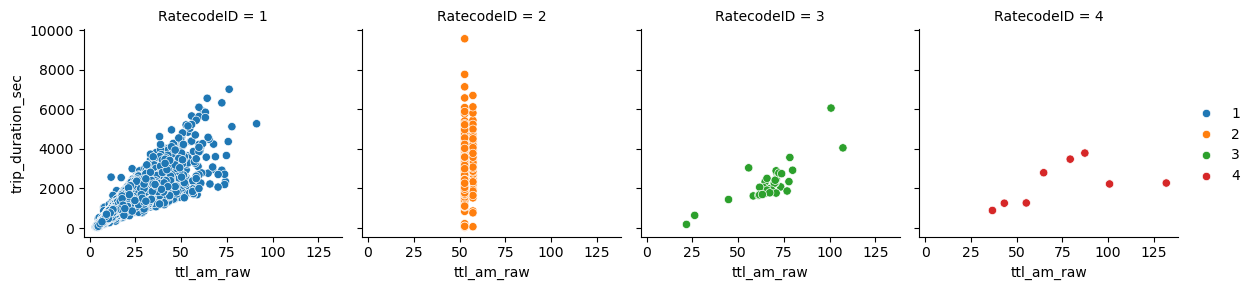

In [15]:
g = sns.FacetGrid(tlc_df, col="RatecodeID")
g.map_dataframe(sns.scatterplot, x= 'ttl_am_raw', y = 'trip_duration_sec', hue="RatecodeID")
g.add_legend()
plt.show()

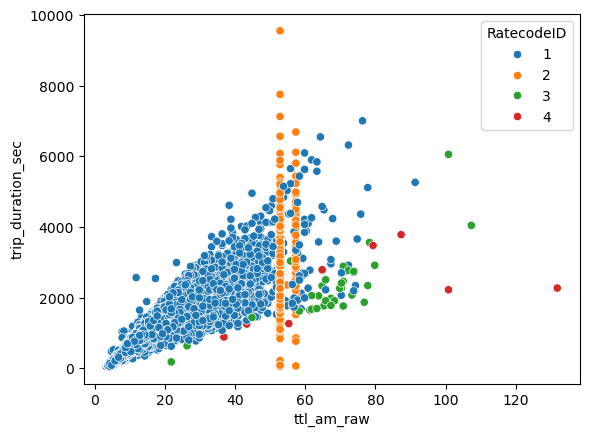

In [13]:
sns.scatterplot(x = tlc_df['ttl_am_raw'], y = tlc_df['trip_duration_sec'], hue = tlc_df['RatecodeID'])
plt.show()

## trip_duration vs. ttl_am_without_tips

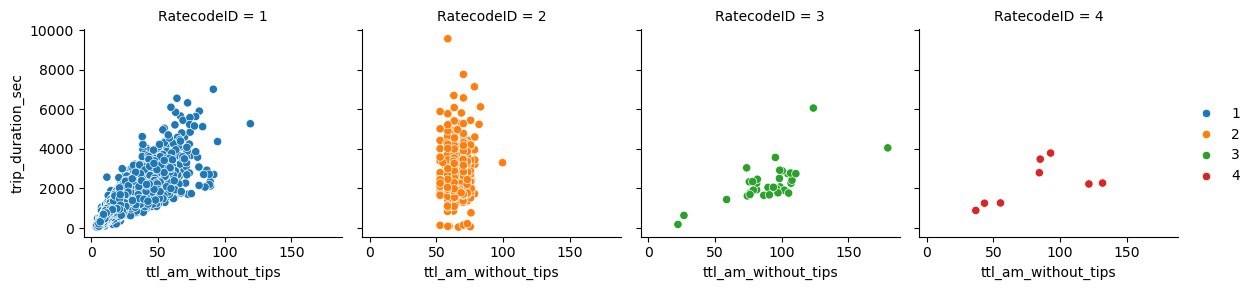

In [16]:
g = sns.FacetGrid(tlc_df, col="RatecodeID")
g.map_dataframe(sns.scatterplot, x= 'ttl_am_without_tips', y = 'trip_duration_sec', hue="RatecodeID")
g.add_legend()
plt.show()

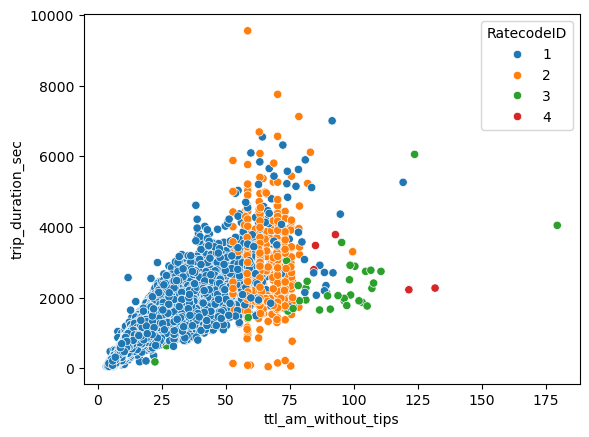

In [17]:
sns.scatterplot(x = tlc_df['ttl_am_without_tips'], y = tlc_df['trip_duration_sec'], hue = tlc_df['RatecodeID'])
plt.show()

## trip_distance vs. ttl_am_raw

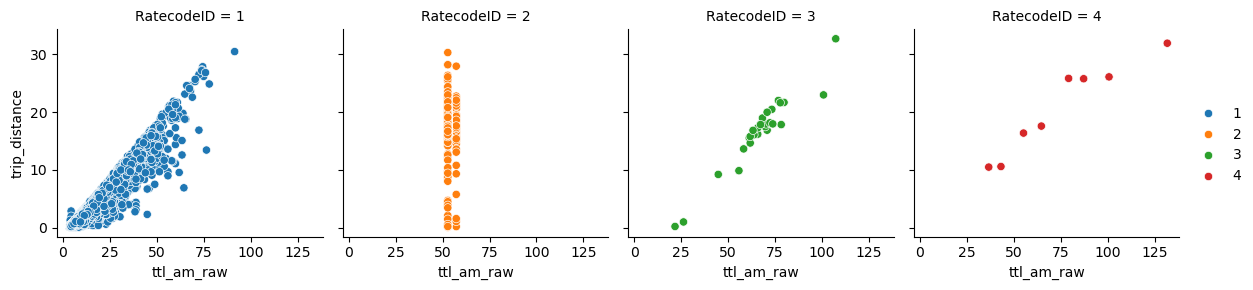

In [18]:
g = sns.FacetGrid(tlc_df, col="RatecodeID")
g.map_dataframe(sns.scatterplot, x= 'ttl_am_raw', y = 'trip_distance', hue="RatecodeID")
g.add_legend()
plt.show()

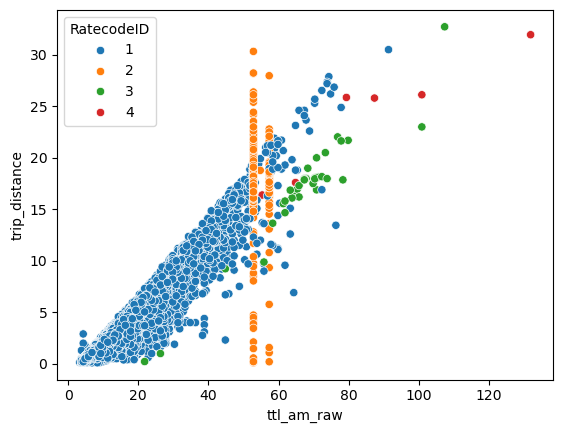

In [19]:
sns.scatterplot(x = tlc_df['ttl_am_raw'], y = tlc_df['trip_distance'], hue = tlc_df['RatecodeID'])
plt.show()

## trip_distance vs. ttl_am_without_tips

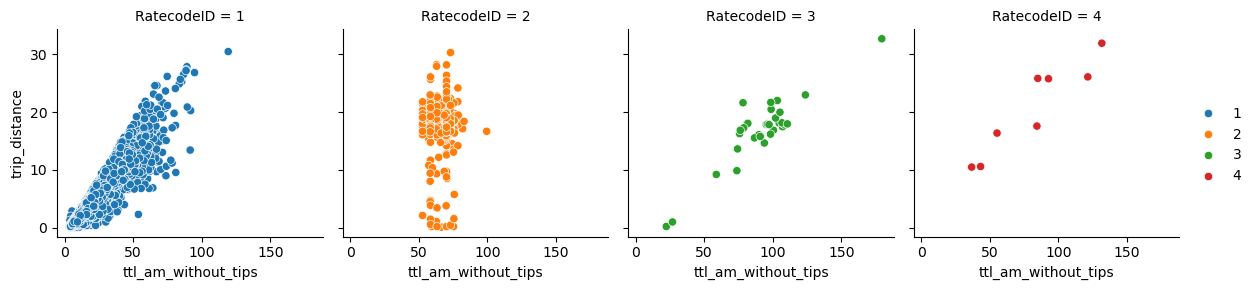

In [20]:
g = sns.FacetGrid(tlc_df, col="RatecodeID")
g.map_dataframe(sns.scatterplot, x= 'ttl_am_without_tips', y = 'trip_distance', hue="RatecodeID")
g.add_legend()
plt.show()

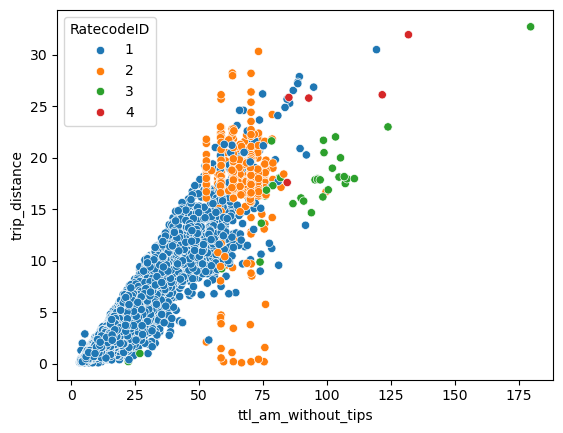

In [21]:
sns.scatterplot(x = tlc_df['ttl_am_without_tips'], y = tlc_df['trip_distance'], hue = tlc_df['RatecodeID'])
plt.show()

## tolls_amount vs. ttl_am_raw

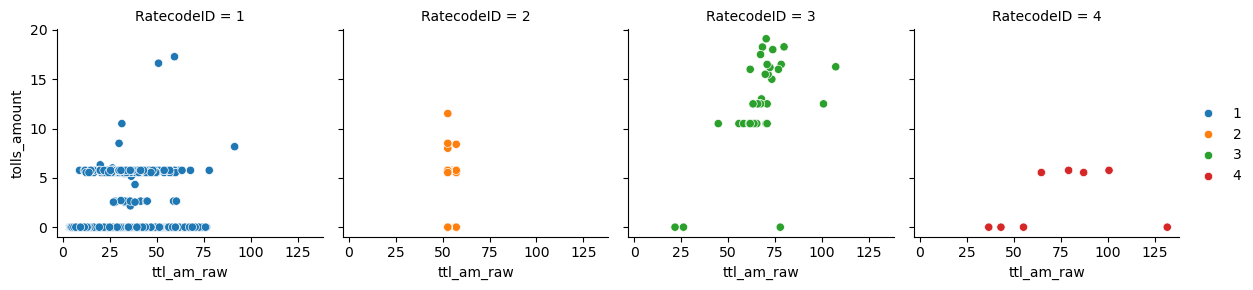

In [23]:
g = sns.FacetGrid(tlc_df, col="RatecodeID")
g.map_dataframe(sns.scatterplot, x= 'ttl_am_raw', y = 'tolls_amount', hue="RatecodeID")
g.add_legend()
plt.show()

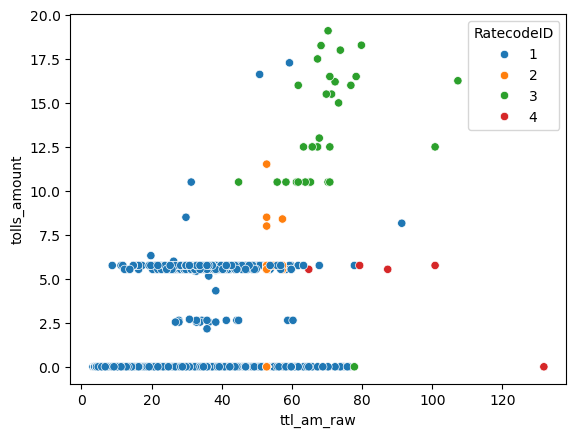

In [24]:
sns.scatterplot(x = tlc_df['ttl_am_raw'], y = tlc_df['tolls_amount'], hue = tlc_df['RatecodeID'])
plt.show()

## tolls_amount vs. ttl_am_without_tips

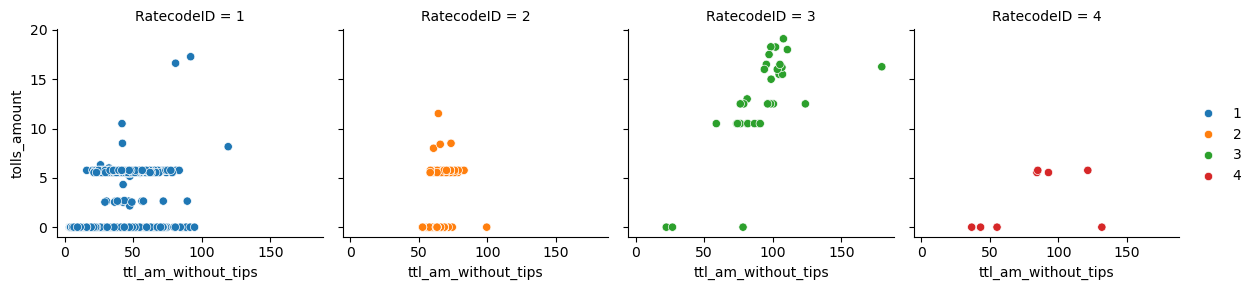

In [25]:
g = sns.FacetGrid(tlc_df, col="RatecodeID")
g.map_dataframe(sns.scatterplot, x= 'ttl_am_without_tips', y = 'tolls_amount', hue="RatecodeID")
g.add_legend()
plt.show()

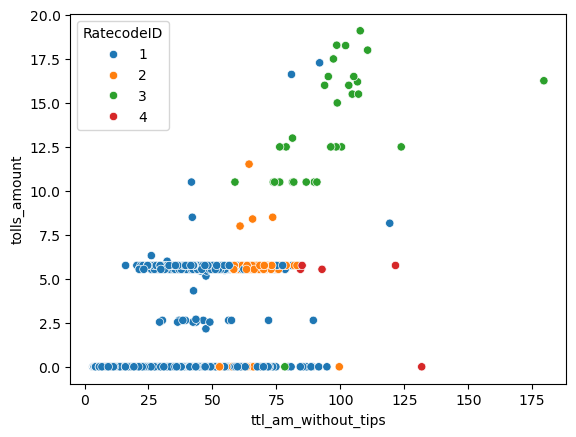

In [26]:
sns.scatterplot(x = tlc_df['ttl_am_without_tips'], y = tlc_df['tolls_amount'], hue = tlc_df['RatecodeID'])
plt.show()

## extra vs. ttl_am_raw

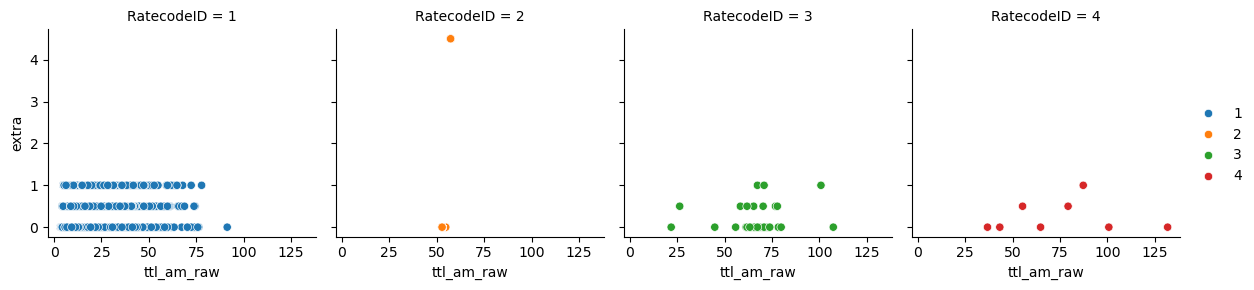

In [29]:
g = sns.FacetGrid(tlc_df, col="RatecodeID")
g.map_dataframe(sns.scatterplot, x= 'ttl_am_raw', y = 'extra', hue="RatecodeID")
g.add_legend()
plt.show()

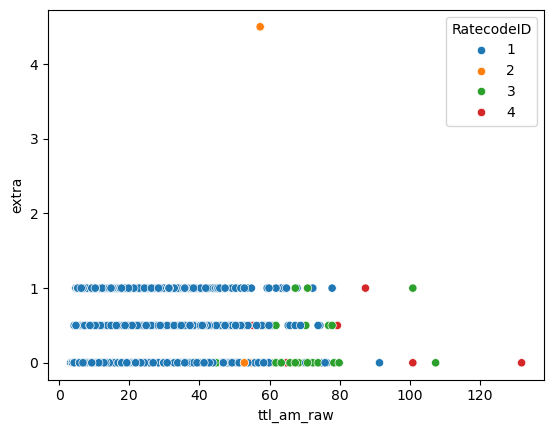

In [30]:
sns.scatterplot(x = tlc_df['ttl_am_raw'], y = tlc_df['extra'], hue = tlc_df['RatecodeID'])
plt.show()

## extra vs. ttl_am_without_tips

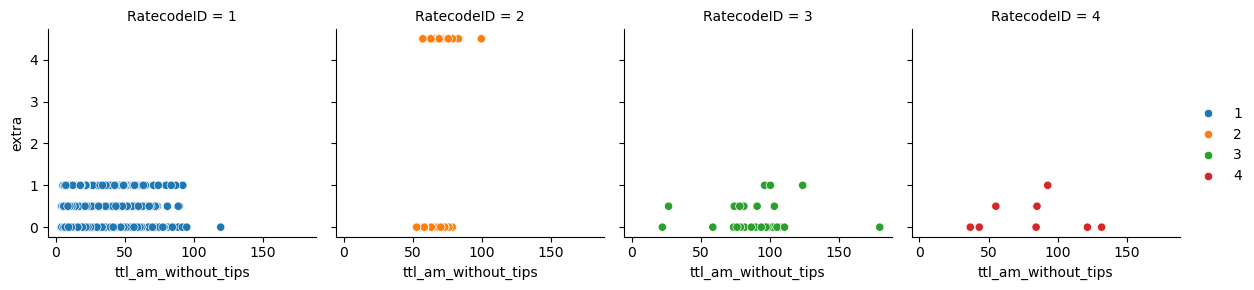

In [28]:
g = sns.FacetGrid(tlc_df, col="RatecodeID")
g.map_dataframe(sns.scatterplot, x= 'ttl_am_without_tips', y = 'extra', hue="RatecodeID")
g.add_legend()
plt.show()

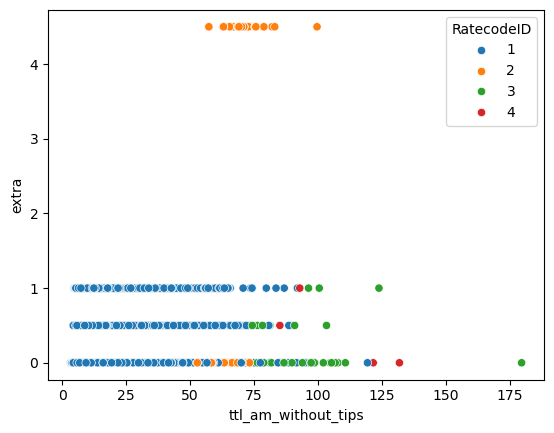

In [27]:
sns.scatterplot(x = tlc_df['ttl_am_without_tips'], y = tlc_df['extra'], hue = tlc_df['RatecodeID'])
plt.show()

## extra vs. hour

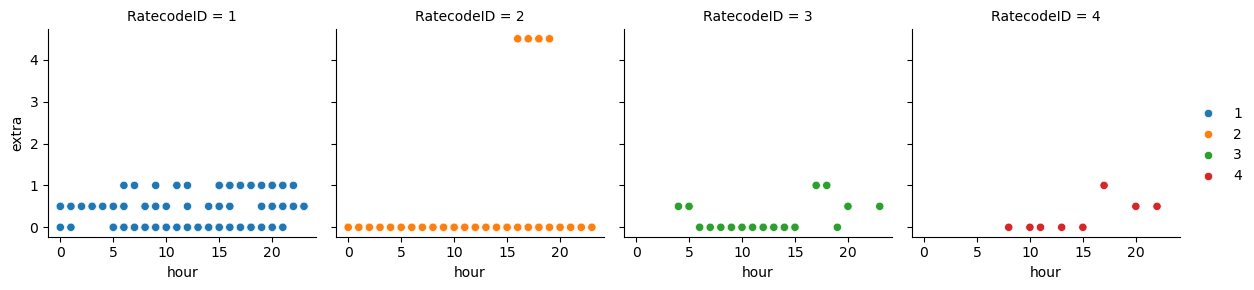

In [33]:
g = sns.FacetGrid(tlc_df, col="RatecodeID")
g.map_dataframe(sns.scatterplot, x= 'hour', y = 'extra', hue="RatecodeID")
g.add_legend()
plt.show()

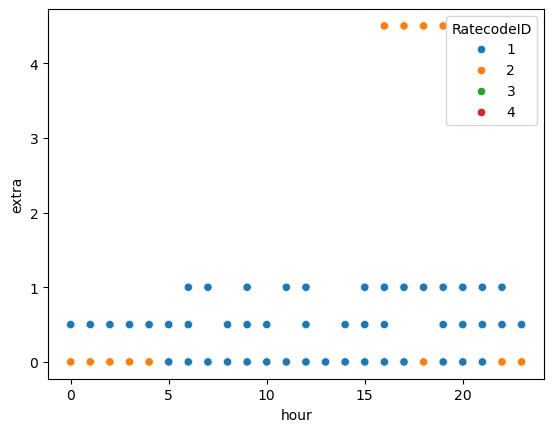

In [34]:
sns.scatterplot(x = tlc_df['hour'], y = tlc_df['extra'], hue = tlc_df['RatecodeID'])
plt.show()

## Considerations about data exploration (4th and 5th notebooks)

1. Weekday and Month didn't stand out as a way of predicting taxi fares: none of them made the total amount vary significantly
2. Because of the granularity of the data, neither PULocationID or DOLocationID are useful for data analysis. Besides that, their patterns can also be described by the RatecodeID variable.
3. RatecodeIDs are helpful to distinguish patterns for the distributions of the following columns: trip_duration_sec, trip_distance, tools_amount, total_am_raw and ttl_am_without_tips.
4. The tolls amount variable doesn't seem to be as useful as other variables for predicting the total amount
5. trip_distance and trip_duration_sec sem to be both directly proportional to ttl_am_raw and ttl_am_without_tips
6. ttl_am_raw helps uncovering of relevant patterns for trip_distance, trip_duration, tolls_amount
7. hour columns is probably the best variable to identify extra amounts